# NLPD

In [1]:

!pip install https://github.com/google-research/perceptual-quality/archive/master.zip
from perceptual_quality import nlpd

     - 45.3 kB 950.3 kB/s 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for perceptual-quality: filename=perceptual_quality-0.1.dev0-py3-none-any.whl size=42291 sha256=10fe635ca7d7ec4c6d91b494fb19fe0c9afcdbaaad350afb61ac859b25de095c
  Stored in directory: /tmp/pip-ephem-wheel-cache-3am48odn/wheels/64/d0/0b/4f1eeb6c2393c1c44ff6cc067539bddd55cac357e7c39291b4
Successfully built perceptual-quality


# import libraries

In [16]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

# DATA - Cifar10

In [8]:

from keras.datasets import cifar10
(x_train_ori, _), (x_test_ori, _) = cifar10.load_data()
x_train = x_train_ori.astype('float32')/255
x_test = x_test_ori.astype('float32')/255


In [9]:
x_train = np.transpose(x_train,(0,3,1,2))
x_test = np.transpose(x_test,(0,3,1,2))
print(x_train.shape)

(50000, 3, 32, 32)


# Loop starts!

In [10]:
# Select the image
nIm = 3
x_np = x_train[nIm:nIm+1,:,:,:]
x_np.shape

# Directional Statistics in a point

# PARTICULAR DISTORTIONS

## Moving up in sensitivity starting from a noisy point

In [25]:
# Generate restricted image

m = -0.3 # min
M = 0.3 # max

x_np_aux2 = np.float32(2*(x_np-0.5))
x_np_aux2_noise = np.float32(np.clip(x_np_aux2,m,M))
Im_noisy_ori = np.transpose(x_np_aux2_noise[0]/2+0.5, (1, 2, 0))

#

lr = 15000
N = 1000

ppp_noisy_up = np.zeros((N,))
mmm_noisy_up = np.zeros((N,))
nnn_noisy_up = np.zeros((N,))
uuu_noisy_up = np.zeros((N,))
sss_noisy_up = np.zeros((N,))

for ii in range(N):

    tf.config.run_functions_eagerly(True)

    A = tf.convert_to_tensor(np.transpose((x_np_aux2[0]+1)*128, (1, 2, 0)))
    B = tf.convert_to_tensor(np.transpose((x_np_aux2_noise[0]+1)*128, (1, 2, 0)))

    B_aux = np.transpose((x_np_aux2_noise[0]+1)*128, (1, 2, 0))

    with tf.GradientTape() as tape:
        tape.watch(B)
        y_hat = tf.reduce_mean(nlpd.nlpd(A, B, 3))

    grads = tape.gradient(y_hat, B)

    B_aux2 = B_aux - lr * grads.numpy()


    B_aux3 = (B_aux2/128.)-1.

    x_np_aux2_noise[0] = np.transpose(np.float32(np.clip(B_aux3,-1,1)), (2, 0, 1))

    # Impose restrictions

    x_np_aux2_noise = np.float32(np.clip(x_np_aux2_noise,m,M))

    # Calculs

    #ccc_noisy[ii] = CONTRIQUE(np.transpose(x_np_aux2_noise[0]/2+0.5, (1, 2, 0)))
    nnn_noisy_up[ii] = np.mean(nlpd.nlpd(tf.convert_to_tensor(np.transpose((x_np_aux2[0]+1)*128, (1, 2, 0))), tf.convert_to_tensor(np.transpose((x_np_aux2_noise[0]+1)*128, (1, 2, 0))),3))

    print(y_hat.numpy(),ii,np.round(nnn_noisy_up[ii],5))

Im_noisy_opt_nlpd = np.transpose(x_np_aux2_noise[0]/2+0.5, (1, 2, 0))

0.26614484 0 0.26287
0.2628665 1 0.25973
0.25972795 2 0.25673
0.2567269 3 0.25385
0.25385138 4 0.25109
0.25108802 5 0.24843
0.24842817 6 0.24587
0.24586678 7 0.2434
0.2433986 8 0.24102
0.24101843 9 0.23872
0.23871942 10 0.2365
0.23649709 11 0.23435
0.23434524 12 0.23226
0.23226185 13 0.23024
0.23024046 14 0.22828
0.2282797 15 0.22638
0.22637524 16 0.22452
0.22452456 17 0.22272
0.22272362 18 0.22097
0.2209704 19 0.21926
0.21926416 20 0.2176
0.2176004 21 0.21598
0.21597646 22 0.21439
0.21439023 23 0.21284
0.2128399 24 0.21133
0.21132506 25 0.20984
0.20984401 26 0.2084
0.2083952 27 0.20698
0.20697767 28 0.20559
0.2055899 29 0.20423
0.20423125 30 0.2029
0.20290077 31 0.2016
0.20159741 32 0.20032
0.20031877 33 0.19907
0.19906582 34 0.19784
0.19783558 35 0.19663
0.19662927 36 0.19545
0.19544564 37 0.19428
0.1942832 38 0.19314
0.1931418 39 0.19202
0.1920202 40 0.19092
0.19091845 41 0.18984
0.18983592 42 0.18877
0.18877147 43 0.18773
0.18772586 44 0.1867
0.18669645 45 0.18568
0.1856842 46 0.18

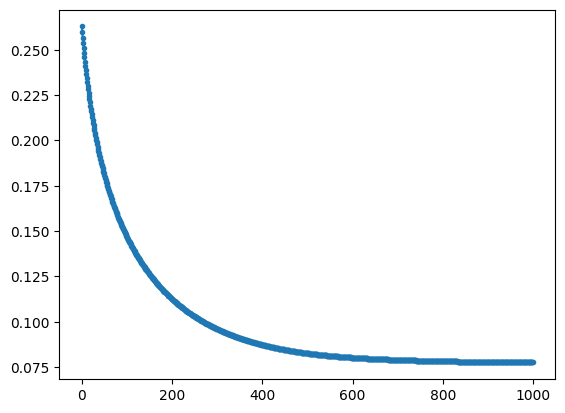

In [26]:
plt.plot(nnn_noisy_up,'.-')

(-0.5, 31.5, 31.5, -0.5)

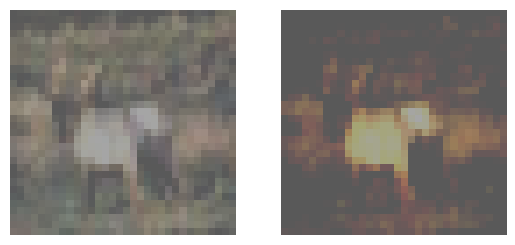

In [27]:
plt.subplot(1,2,1)
plt.imshow(Im_noisy_opt_nlpd)
plt.axis('off')
plt.subplot(1,2,2)
plt.imshow(Im_noisy_ori)
plt.axis('off')